# Liver Cirrhosis Prediction

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
#   Dataset Describtion

# 1D: unique identifier of patients
#2) N_Days: number of days between registration and the earlier of death, 
#3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
#4) Drug: type of drug D-penicillamine or placebo
#5) Age: age in [days]
#6) Sex: M (male) or F (female)
#7) Ascites: presence of ascites N (No) or Y (Yes)
#8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
#9) Spiders: presence of spiders N (No) or Y (Yes)
#10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
#11) Bilirubin: serum bilirubin in [mg/dl]
#12) Cholesterol: serum cholesterol in [mg/dl]
#13) Albumin: albumin in [gm/dl]
#14) Copper: urine copper in [ug/day]
#15) Alk_Phos: alkaline phosphatase in [U/liter]
#16) SGOT: SGOT in [U/ml]
#17) Triglycerides: triglicerides in [mg/dl]
#18) Platelets: platelets per cubic [ml/1000]
#19) Prothrombin: prothrombin time in seconds [s]
#20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [2]:
# importing required libraries
import numpy as np # linear algebra
import pandas as pd # data analysis and manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [3]:
df = pd.read_csv('cirrhosis.csv')# read the csv file
df.head()# display top 5 records

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()# dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1102 non-null   int64  
 1   N_Days         1102 non-null   int64  
 2   Status         1102 non-null   object 
 3   Drug           890 non-null    object 
 4   Age            1102 non-null   int64  
 5   Sex            1102 non-null   object 
 6   Ascites        890 non-null    object 
 7   Hepatomegaly   890 non-null    object 
 8   Spiders        890 non-null    object 
 9   Edema          1102 non-null   object 
 10  Bilirubin      1102 non-null   float64
 11  Cholesterol    822 non-null    float64
 12  Albumin        1102 non-null   float64
 13  Copper         883 non-null    float64
 14  Alk_Phos       890 non-null    float64
 15  SGOT           890 non-null    float64
 16  Tryglicerides  815 non-null    float64
 17  Platelets      1079 non-null   float64
 18  Prothrom

In [5]:
# finding shape of the data
shape=df.shape
print("shape of the Datasets :",shape)

shape of the Datasets : (1102, 20)


In [6]:
df.isnull().sum()# total number of missing values

ID                 0
N_Days             0
Status             0
Drug             212
Age                0
Sex                0
Ascites          212
Hepatomegaly     212
Spiders          212
Edema              0
Bilirubin          0
Cholesterol      280
Albumin            0
Copper           219
Alk_Phos         212
SGOT             212
Tryglicerides    287
Platelets         23
Prothrombin        4
Stage             12
dtype: int64

In [7]:
# Few columns have missing values like drug, ascites,hepqtomegaly,spiterans,Cholesterol so on , 
#i will fill those values using some statistical methods by categories and numerical seperately

# Handling Missing Values

### Filling numeric missing values

In [8]:
#Numerical data ( Age, Cholesterol, Platelets and so on)
# Categorical Data ( Drug, Sex, Spiders and so on)

# i am using different statistical methods to fill null values
# For the numerical type we can use mean or median. 
# to avoid skewing in the presence of outliersi am using  median.
# For Categorical type we will impute the most frequent class.

In [9]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_numeric = df.select_dtypes(include=(['int64', 'float64'])).columns # assigning float and int dtypes in df_numeric
for c in df_numeric: # iterate over the df_numeric
    df[c].fillna(df[c].median(), inplace=True)# filling numeric missing value by median

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()# display null value in df_numeric after filling by median

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### Filling object missing values

In [10]:
df.isnull().sum()# finding missing values in string dtypes

ID                 0
N_Days             0
Status             0
Drug             212
Age                0
Sex                0
Ascites          212
Hepatomegaly     212
Spiders          212
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
dtype: int64

In [11]:
df_object = df.select_dtypes(include=('object')).columns# assigning float and int dtypes in df_object
for i in df_object: # iterate over the df_object
    df[i].fillna(df[i].mode().values[0], inplace=True)# filling numeric missing value by mode
    
df.select_dtypes(include=('object')).isna().sum()# display null value in df_object after filling by mode.

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [12]:
df.isnull().sum()# checking null values all together

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# Exploratory Data Analysys

### Univariate Analysis-Target variables

In [13]:
df['Stage'].value_counts()# unique values and count of target variable

3.0    437
4.0    382
2.0    235
1.0     48
Name: Stage, dtype: int64

Text(0.5, 1.0, 'Patients counts of each stage')

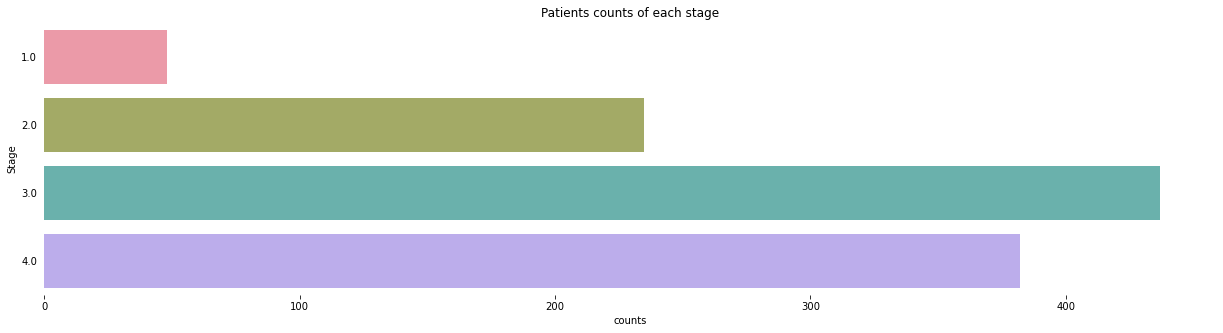

In [14]:
# plot target variable in horizontal bar chart
plt.figure(figsize=(21,5)) # size of the figure
sns.countplot(y=df['Stage'], palette="husl", alpha=0.8, ) # visualize in countplot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='y', which='both', bottom=False, top=False, left=False) # missalineous details about chart
plt.xlabel('counts') # x axis
plt.title('Patients counts of each stage')# title

#### Target is to predict liver cirrhosis. Our data set contains both categorical and numerical variable. In liver cirrhosis there are 4 stages
#### Note: There are 4 stages of Liver cirrhosis
#### Stage 1 : Normal
#### Stage 2 : Fatty Liver
#### Stage 3 : Liver Fibrosis
#### Stage 4 : Liver Cirrhosis

In [15]:
# Target variables are four different types i.e, stages of cirrhosis, i convert stage 4, stage 1, stage 2 in no cirrhosis 
# and 2 is cirrhosis
df['Stage'] = np.where(df['Stage'] == 4,1,0)

In [16]:
df['Stage'].value_counts()# now check the value counts of two target variables

0    720
1    382
Name: Stage, dtype: int64

In [17]:
#We may use a count plot for categorical data and a distribution plot for numerical variables to do some Univariate Analysis. 
#We may use box plots and bar plots for bivariate analysis.

### Bivariate analysis

Text(0.5, 1.0, 'Counts of patients in each gender')

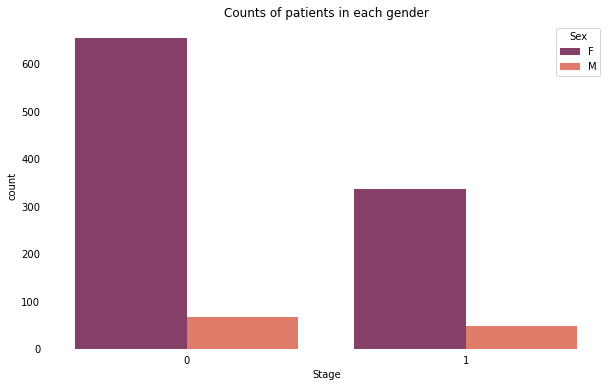

In [18]:
# Gender vs cirrhosis
plt.figure(figsize=(10,6))

sns.countplot(x=df['Stage'], hue=df['Sex'], palette="rocket", alpha=0.9)# countplot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)# axis ticks
plt.title('Counts of patients in each gender')# title of chart

Text(0.5, 1.0, 'Ascites proportion across cirrhosis')

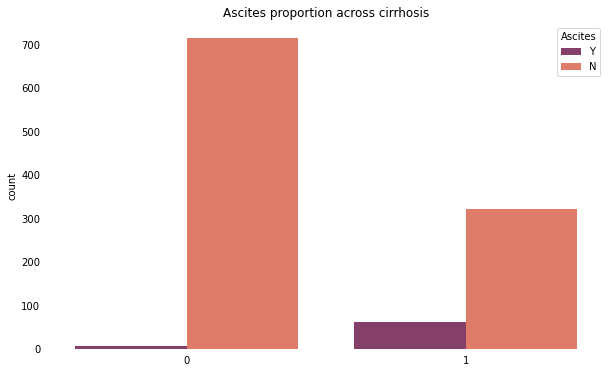

In [19]:
# Ascites vs Cirrhosis
plt.figure(figsize=(10,6))

sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='rocket', alpha=0.9)# countplot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)# axis ticks
plt.xlabel('')
plt.title('Ascites proportion across cirrhosis')# chart title

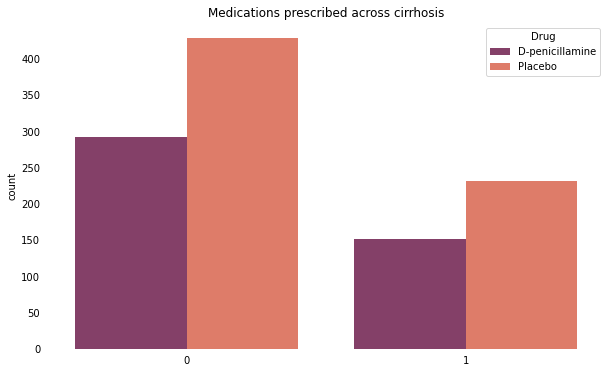

In [20]:
#Medications prescribed vs cirrhosis
plt.figure(figsize=(10,6))# fig size

sns.countplot(x=df['Stage'], hue=df['Drug'], palette='rocket', alpha=0.9)# countplot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across cirrhosis');# chart title


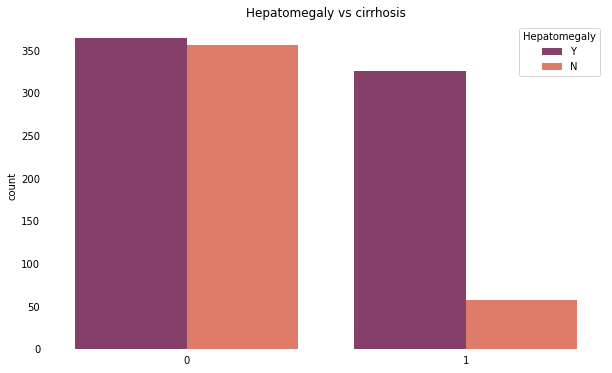

In [21]:
# Hepatomegaly vs cirrhosis
plt.figure(figsize=(10,6))

sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='rocket', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly vs cirrhosis');

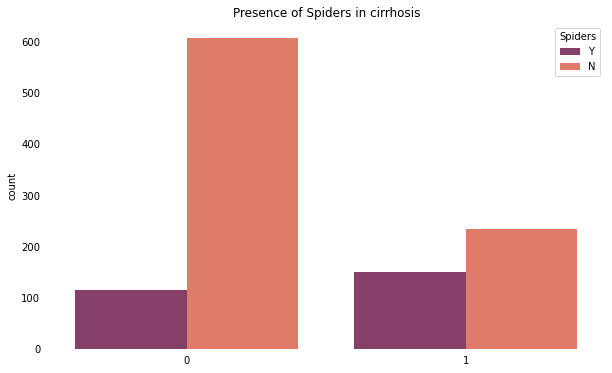

In [22]:
# Presence of Spiders in cirrhosis
plt.figure(figsize=(10,6))

sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='rocket', alpha=0.9)# count plot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders in cirrhosis');# title chart

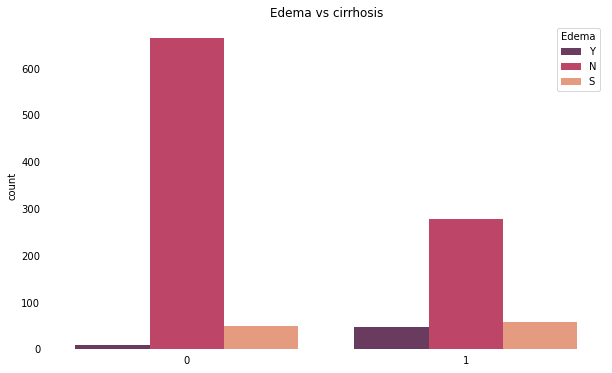

In [23]:
# Edema vs cirrhosis
plt.figure(figsize=(10,6))# fig size
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='rocket', alpha=0.9)# countplot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)# axis ticks
plt.xlabel('')
plt.title('Edema vs cirrhosis'); 

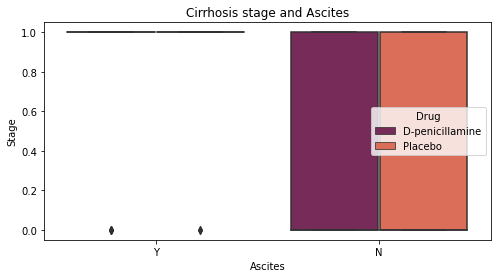

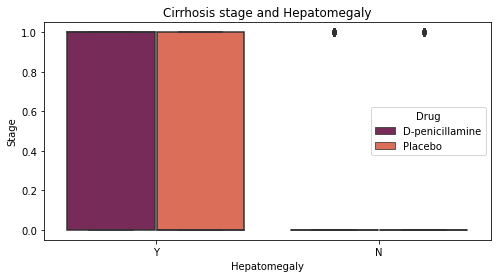

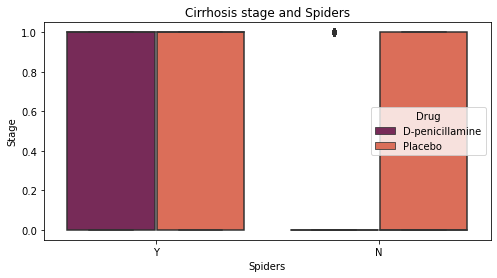

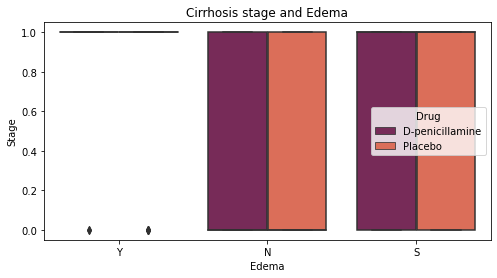

In [24]:
# analysing patients drug using for cirrhosis
diseases = list(df.iloc[:,6:-1].columns)

for d in diseases:
    if df[d].dtype == 'object': # if condition for dtypes object
        plt.figure(figsize=(8,4)) # size
        Feature = 'Cirrhosis stage and ' + str(d)
        plt.title(Feature) # title
        sns.boxplot(x=df[d], y=df['Stage'], hue=df['Drug'],palette="rocket"); # visualize in box

In [25]:
# Bivariate analysis conclusion

#If we look attentively, we can find some fascinating insights. 
# In the instance of ascites, we can see that the risk of illness increases as the amount of ascites increases. 
# The presence of spiders is also linked to a higher risk of sickness.
# if Hepatomegaly is yes , the risk of cirrhosis is increased.
# female patients are most affected by cirrhosis compare with male.
# if using both drug , can reduce the risk of cirrhosis,so, we can avoid death, if we found cirrhosis early.
# placibo drugs are most used by people.

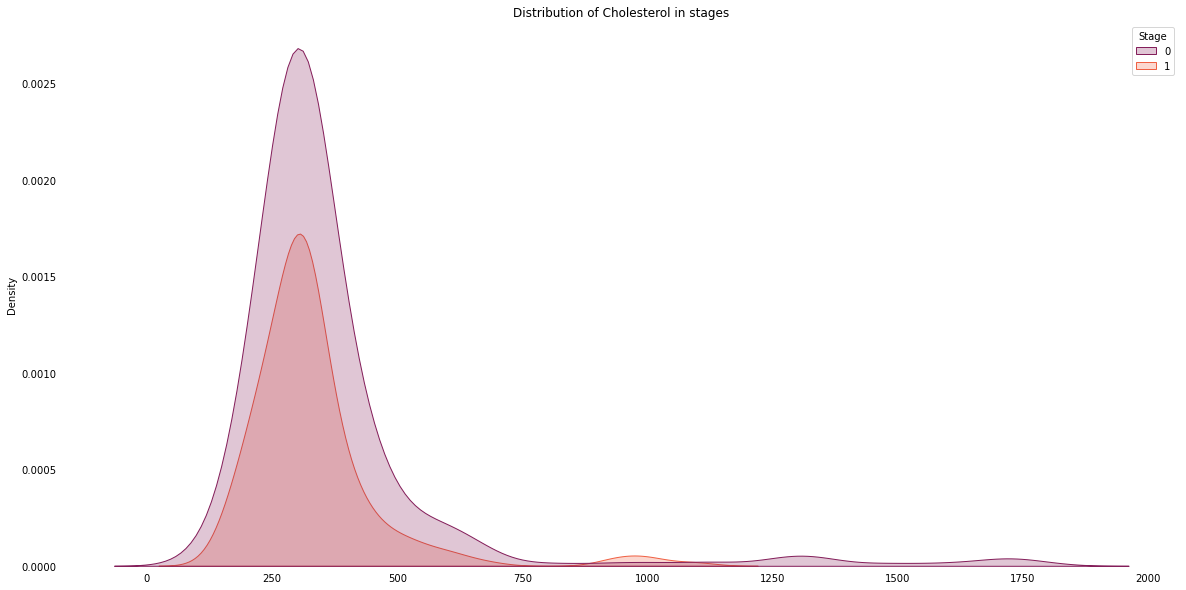

In [26]:
# distribution of cholesteral in cirrhosis
plt.figure(figsize=(20,10))# fig size
sns.kdeplot(df['Cholesterol'], hue=df['Stage'], fill=True, palette='rocket')# kdeplot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)# tick axis
plt.xlabel('')
plt.title('Distribution of Cholesterol in stages');

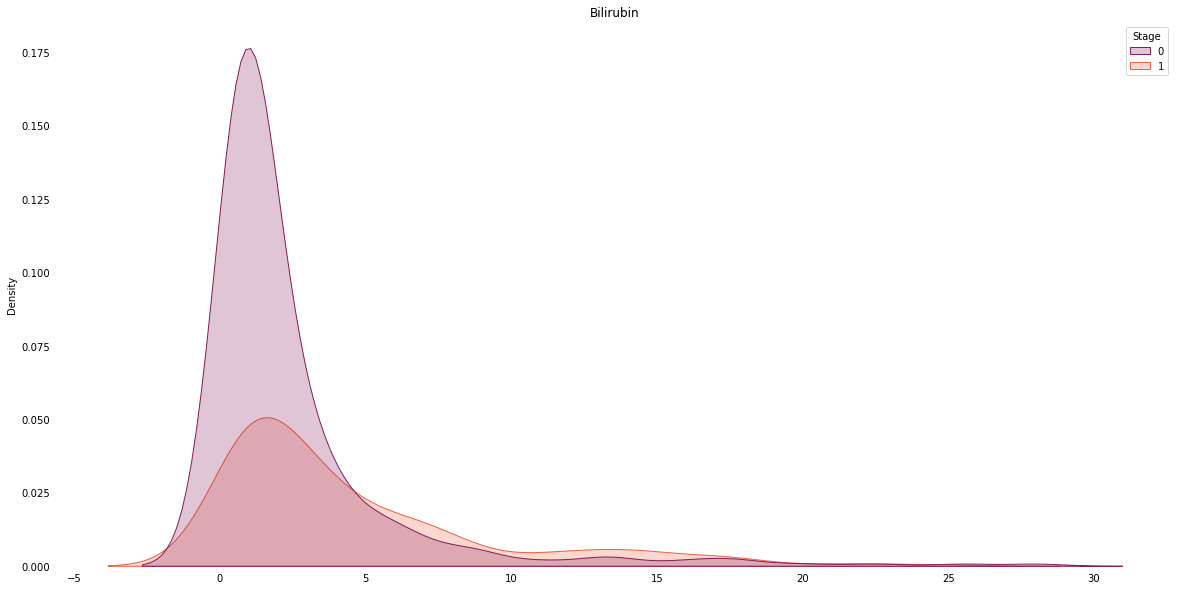

In [27]:
# distribution of bilirubin in cirrhosis
plt.figure(figsize=(20,10))
sns.kdeplot(df['Bilirubin'], hue=df['Stage'], fill=True, palette='rocket', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

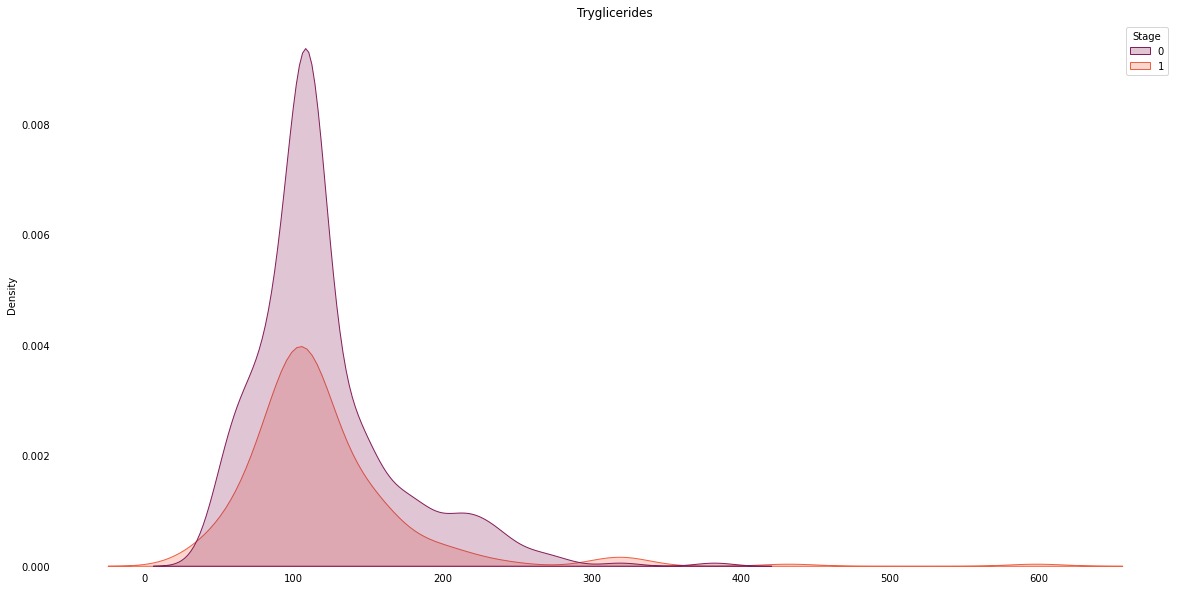

In [28]:
# distribution of trygliceride
plt.figure(figsize=(20,10))
sns.kdeplot(df['Tryglicerides'], hue=df['Stage'], fill=True, palette='rocket', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

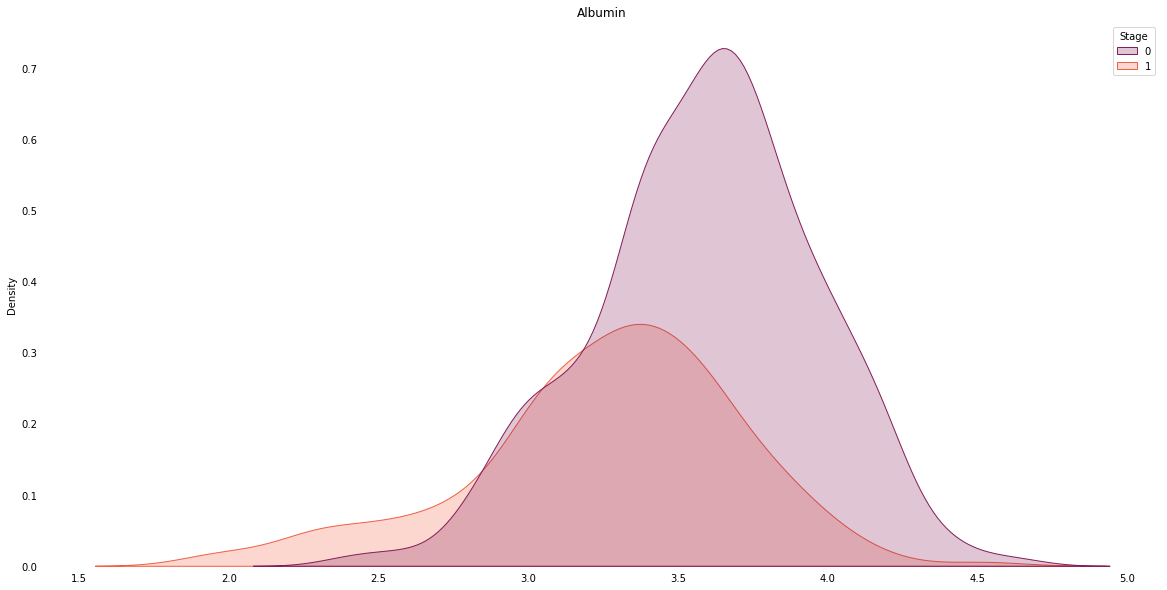

In [29]:
# distrubution of albumin
plt.figure(figsize=(20,10))
sns.kdeplot(df['Albumin'], hue=df['Stage'], fill=True, palette='rocket', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

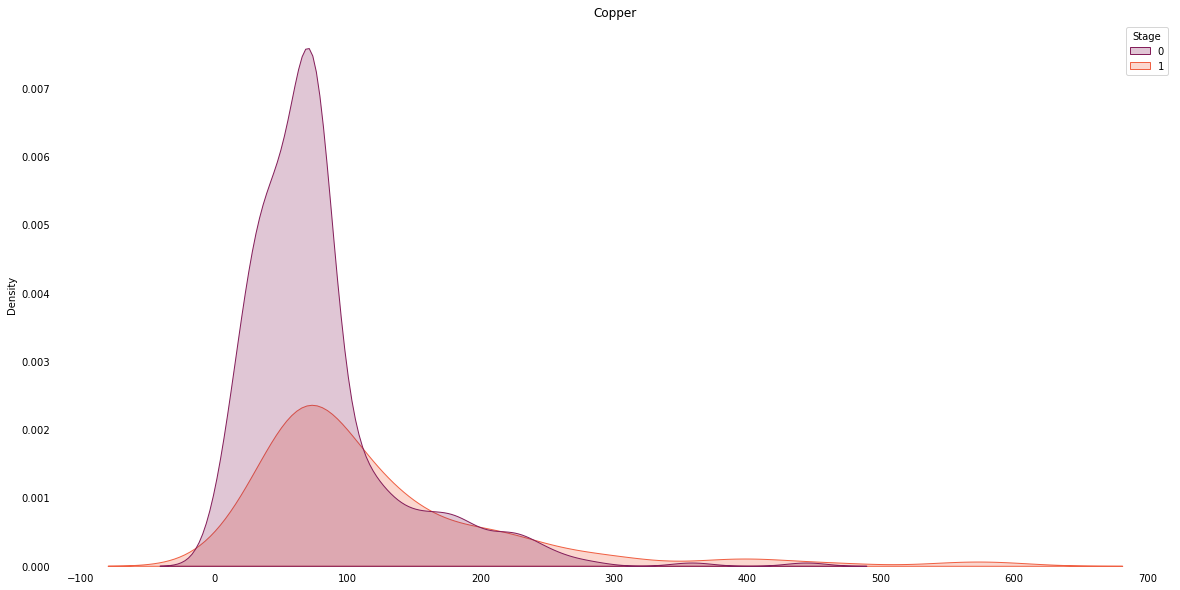

In [30]:
# distribution of copper
plt.figure(figsize=(20,10))
sns.kdeplot(df['Copper'], hue=df['Stage'], fill=True, palette='rocket', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

In [31]:
### conclusion for distribution plot

# Looking at the feature distribution we can observe that in features such as  cholestral, Copper 
# We can see normal distribution in albumin if have risk of cirrhosis.
#the risk of the disease increase with increase in feature value,
#thus having a positive co-relation on with the disease probability.

# Multivariate Analysis

In [32]:
#The Pearson correlation technique is the most often used approach for numerical variables;
#it assigns a number between 0 and 1, with 0 indicating no connection, 1 indicating entire positive correlation,
#and 1 indicating total negative correlation. This can be translated as follows:
#A correlation value of 0.7 between two variables indicates that the two have a significant and positive link.


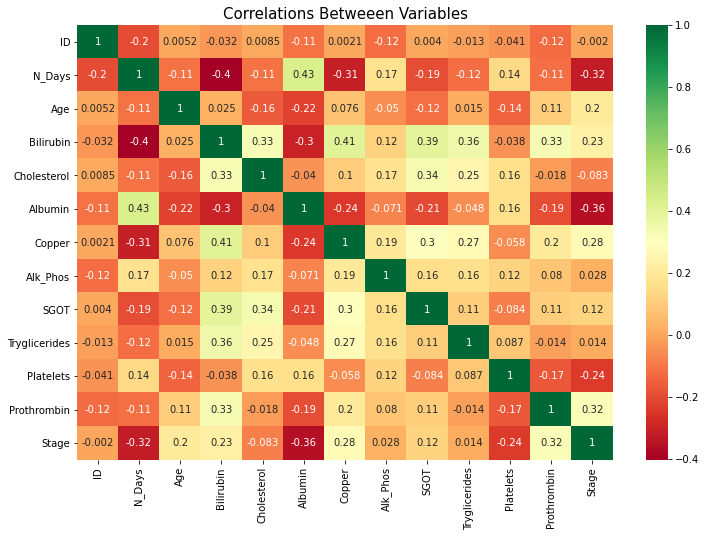

In [33]:
# pearson co relation 
plt.figure(figsize=(12,8))# fig size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")# plot heatmap in corelation values
plt.title("Correlations Betweeen Variables", size=15)# title
plt.show()# plot

In [34]:
### n-days and albumin are negative corelation with target variable, in which n-days and albumin decreases ,target variable increase,
### we can see most of the values are negative impact on cirrhosis
### n-days with albumin, billurbin with copper, are positive corelation with almost 0.5%
### the reson behind this co relation is to find the features is highly co related with another features,
### if it is highly co related, if it is more than our threshold value for instance 0.80%
### we need to take either of them, because both are doing similar job.

# Data Pre-Processing

### convert object into numeric

In [35]:
# replacing catagorical data with intigers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})  # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1}) # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1}) # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1}) # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1}) # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1}) # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1}) # 'C':0, 'CL':1, 'D':-1

### Convert day into Age

In [36]:
df["Age"] = (df["Age"]/365)# number of days living of patients given 365(365 days a year)
df["Age"] = df["Age"].astype("int64")# changing dtypes

In [37]:
df.Age.head()

0    58
1    56
2    70
3    54
4    38
Name: Age, dtype: int64

In [38]:
df.info()# checking information again after doing lots of pre_processing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1102 non-null   int64  
 1   N_Days         1102 non-null   int64  
 2   Status         1102 non-null   int64  
 3   Drug           1102 non-null   int64  
 4   Age            1102 non-null   int64  
 5   Sex            1102 non-null   int64  
 6   Ascites        1102 non-null   int64  
 7   Hepatomegaly   1102 non-null   int64  
 8   Spiders        1102 non-null   int64  
 9   Edema          1102 non-null   int64  
 10  Bilirubin      1102 non-null   float64
 11  Cholesterol    1102 non-null   float64
 12  Albumin        1102 non-null   float64
 13  Copper         1102 non-null   float64
 14  Alk_Phos       1102 non-null   float64
 15  SGOT           1102 non-null   float64
 16  Tryglicerides  1102 non-null   float64
 17  Platelets      1102 non-null   float64
 18  Prothrom

# Splitting the data

In [39]:
# assigning the Features and Target
X = df.drop(["ID","Stage"], axis=1) # drop id, stage
y = df.pop('Stage') # y values is stage , i.e., we going to predict

In [40]:
from sklearn.model_selection import train_test_split # libraries for train test split
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.3, shuffle=False) # seperation for train test split 

# Feature Selection

### MUTUAL INFORMATION CLASSIFICATION

In [41]:
from sklearn.feature_selection import mutual_info_classif
# finding the mutual information for selecting features
### higher values mean higher dependency and lower values means lower dependency
mutual_info = mutual_info_classif(X_trains, y_trains,random_state=42)
mutual_info

array([0.23323943, 0.0556441 , 0.        , 0.0765425 , 0.00647662,
       0.01334904, 0.05463927, 0.02433502, 0.0236765 , 0.12121359,
       0.16257704, 0.15523026, 0.12942918, 0.26565332, 0.14118388,
       0.09902431, 0.19159578, 0.11499009])

In [42]:
mutual_info = pd.Series(mutual_info)# make it series
mutual_info.index = X_trains.columns
mutual_info.sort_values(ascending=False) # display from higher dependency

Alk_Phos         0.265653
N_Days           0.233239
Platelets        0.191596
Cholesterol      0.162577
Albumin          0.155230
SGOT             0.141184
Copper           0.129429
Bilirubin        0.121214
Prothrombin      0.114990
Tryglicerides    0.099024
Age              0.076542
Status           0.055644
Hepatomegaly     0.054639
Spiders          0.024335
Edema            0.023677
Ascites          0.013349
Sex              0.006477
Drug             0.000000
dtype: float64

### Assigning and Splitting the columns after feature selection

In [43]:
x = df[["N_Days","Alk_Phos","Platelets","Cholesterol","Albumin","SGOT"]] # assigning selected features for x
# "N_Days","Alk_Phos","Platelets","Cholesterol","Albumin","SGOT" -- columns which i using to build the model

# Model Building

## Logistics Regression

In [44]:
from sklearn.linear_model import LogisticRegression # importing logistic regression 
from sklearn.model_selection import StratifiedKFold # stratifiedKfold for balancing date while shuffle and split
from sklearn.model_selection import cross_val_score # cross valid sore for each taining set
log_model = LogisticRegression(max_iter=5000, solver='saga') # lr object
skf = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)# stratified object

acc=[] 
def training(train, test, fold_no): # function
    X_train = train # assigning x train
    y_train = y.iloc[train_index]# y train
    X_test = test# x test
    y_test = y.iloc[test_index] # y test
    log_model.fit(X_train, y_train) # fitting lr model
    score = log_model.score(X_test,y_test) # score
    acc.append(score) # append score in acc
    print('For Fold {} the accuracy rate is {}'.format(str(fold_no),score)) # printing with fold number and score
    
fold_no = 1
for train_index,test_index in skf.split(x, y):
    train = x.iloc[train_index,:]
    test = x.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1 # increment
print() # print blank for seperate from cross valid score
print('Logestic Regression Mean Accuracy = ', np.mean(acc))# mean score

For Fold 1 the accuracy rate is 0.6666666666666666
For Fold 2 the accuracy rate is 0.6756756756756757
For Fold 3 the accuracy rate is 0.7454545454545455
For Fold 4 the accuracy rate is 0.7
For Fold 5 the accuracy rate is 0.7454545454545455
For Fold 6 the accuracy rate is 0.7727272727272727
For Fold 7 the accuracy rate is 0.6909090909090909
For Fold 8 the accuracy rate is 0.7272727272727273
For Fold 9 the accuracy rate is 0.7
For Fold 10 the accuracy rate is 0.6909090909090909

Logestic Regression Mean Accuracy =  0.7115069615069615


In [45]:
# classification metrics fpr log reg
from sklearn.metrics import classification_report
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        72
           1       0.64      0.24      0.35        38

    accuracy                           0.69       110
   macro avg       0.67      0.58      0.57       110
weighted avg       0.68      0.69      0.64       110



In [46]:
from sklearn.metrics import confusion_matrix
 
results = confusion_matrix(y.iloc[test_index], log_model_predict)
print(results)

[[67  5]
 [29  9]]


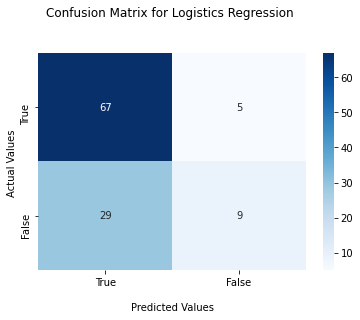

In [47]:
# confusion matrix
import seaborn as sns

ax = sns.heatmap(results, annot=True, cmap='Blues')# showing confusion matrix in heatmap

ax.set_title('Confusion Matrix for Logistics Regression \n\n');# title
ax.set_xlabel('\nPredicted Values')# x lable
ax.set_ylabel('Actual Values ');# ylable

## Ticket labels
ax.xaxis.set_ticklabels(['True','False'])# true , false in x axis
ax.yaxis.set_ticklabels(['True','False'])# true , false in y axis

## Display the visualization of the Confusion Matrix.
plt.show()

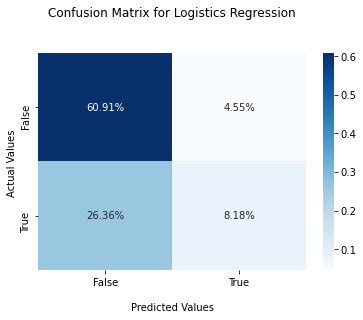

In [48]:
# confusion matrix in percentage
ax = sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')# showing confusion matrix in heatmap with percentage

ax.set_title('Confusion Matrix for Logistics Regression\n\n');# title
ax.set_xlabel('\nPredicted Values')# x lable
ax.set_ylabel('Actual Values ');# y lable

## Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])# true , false in x axis
ax.yaxis.set_ticklabels(['False','True'])# true , false in y axis

## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
# roc and auc score for finding reliability of accuracy ( calculting hypothesis)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr_1, tpr_1, threshold_1 = roc_curve(y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc_1 = auc(fpr_1, tpr_1)

print('AUC : ', roc_auc_score(y.iloc[test_index], log_model_predict_proba[:,1]))

AUC :  0.6257309941520468


### XG BOOST

In [50]:
from sklearn.model_selection import StratifiedKFold # stratified k fold for cross valid
from xgboost import XGBClassifier #importing xgb libraries
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # spliting into 10
model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error') # tried learning rate values between range [0.01 - 10] & depth [2-8]

acc=[]
def training(train, test, fold_no): # function for xgboost model
    X_train = train# xtrain
    y_train = y.iloc[train_index]# ytrain
    X_test = test#xtest
    y_test = y.iloc[test_index]#ytest
    model.fit(X_train, y_train)#fitting the xgboost model
    score = model.score(X_test,y_test)# xgboost score
    acc.append(score)# append score
    print('For Fold {} the accuracy rate is {}'.format(str(fold_no),score))# print each fold

fold_no = 1 # assign
for train_index,test_index in skf.split(x, y): # iterate over the train_index, test_index, in strafied split
    train = x.iloc[train_index,:] # train
    test = x.iloc[test_index,:]# test 
    training(train, test, fold_no) # train test fold calling
    fold_no += 1# increment 
print() # print blank space
print('XGboost model Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy rate is 0.9819819819819819
For Fold 2 the accuracy rate is 0.9819819819819819
For Fold 3 the accuracy rate is 0.9818181818181818
For Fold 4 the accuracy rate is 0.9636363636363636
For Fold 5 the accuracy rate is 0.9818181818181818
For Fold 6 the accuracy rate is 1.0
For Fold 7 the accuracy rate is 0.9818181818181818
For Fold 8 the accuracy rate is 0.9818181818181818
For Fold 9 the accuracy rate is 0.9818181818181818
For Fold 10 the accuracy rate is 0.9636363636363636

XGboost model Mean Accuracy =  0.9800327600327601


In [51]:
# classification report for xgb
from sklearn.metrics import classification_report
XGB_model_predict = model.predict(test)
XGB_model_predict_proba = model.predict_proba(test)

print(classification_report(y.iloc[test_index], XGB_model_predict))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        38

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



In [52]:
from sklearn.metrics import confusion_matrix
 
results1 = confusion_matrix(y.iloc[test_index], XGB_model_predict)
print(results1)

[[70  2]
 [ 2 36]]


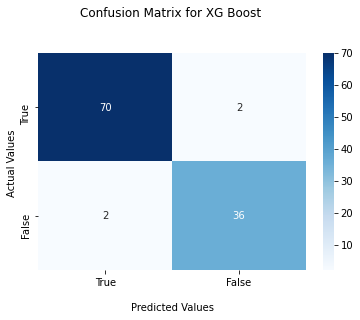

In [53]:
# confusion matrix for xg boost
import seaborn as sns

ax = sns.heatmap(results1, annot=True, cmap='Blues')# showing confusion matrix in heatmap

ax.set_title('Confusion Matrix for XG Boost \n\n');# title
ax.set_xlabel('\nPredicted Values')# x lable
ax.set_ylabel('Actual Values ');# ylable

## Ticket labels
ax.xaxis.set_ticklabels(['True','False'])# true , false in x axis
ax.yaxis.set_ticklabels(['True','False'])# true , false in y axis

## Display the visualization of the Confusion Matrix.
plt.show()

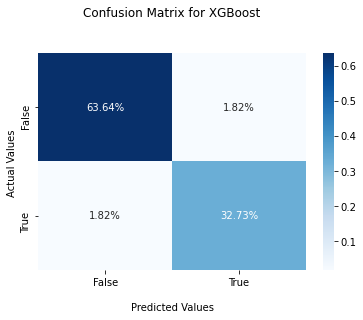

In [54]:
# confusion matrix in percentage
ax = sns.heatmap(results1/np.sum(results1), annot=True, 
            fmt='.2%', cmap='Blues')# showing confusion matrix in heatmap with percentage

ax.set_title('Confusion Matrix for XGBoost\n\n');# title
ax.set_xlabel('\nPredicted Values')# x lable
ax.set_ylabel('Actual Values ');# y lable

## Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])# true , false in x axis
ax.yaxis.set_ticklabels(['False','True'])# true , false in y axis

## Display the visualization of the Confusion Matrix.
plt.show()

In [55]:
# roc and auc for xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr_2, tpr_2, threshold_2 = roc_curve(y.iloc[test_index], XGB_model_predict_proba[:,1])
roc_auc_2 = auc(fpr_2, tpr_2)

print('AUC : ', roc_auc_score(y.iloc[test_index], XGB_model_predict_proba[:,1]))

AUC :  0.9480994152046784


# Random Forest Algorithm

In [56]:
# random forest classification
from sklearn.model_selection import StratifiedKFold # stratified foe cross valid
from sklearn.ensemble import RandomForestClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # nsplit of 10
forest = RandomForestClassifier() # random forest object
acc=[] 
def training(train, test, fold_no): # function for train test split
    X_train = train # x train
    y_train = y.iloc[train_index]# y -train
    X_test = test# x test 
    y_test = y.iloc[test_index]# y test
    forest.fit(X_train, y_train)# fitting random  forest model
    score = forest.score(X_test,y_test) # getting score of random forest model 
    acc.append(score) # append score
    print('For Fold {} the accuracy rate is {}'.format(str(fold_no),score)) # printing each score

fold_no = 1
for train_index,test_index in skf.split(x, y): # for loop for iterate over the stratified split
    train = x.iloc[train_index,:]
    test = x.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc)) # mean accuracy of 10 iteration

For Fold 1 the accuracy rate is 0.9819819819819819
For Fold 2 the accuracy rate is 0.9819819819819819
For Fold 3 the accuracy rate is 0.9636363636363636
For Fold 4 the accuracy rate is 0.9636363636363636
For Fold 5 the accuracy rate is 1.0
For Fold 6 the accuracy rate is 0.9818181818181818
For Fold 7 the accuracy rate is 0.9818181818181818
For Fold 8 the accuracy rate is 0.9636363636363636
For Fold 9 the accuracy rate is 0.9818181818181818
For Fold 10 the accuracy rate is 0.9636363636363636

XGboost model Mean Accuracy =  0.9763963963963963


In [57]:
# classification report for forest
from sklearn.metrics import classification_report
forest_model_predict = forest.predict(test)# finding y_predict(predicted)
forest_model_predict_proba = forest.predict_proba(test)# predict_proba for roc score

print(classification_report(y.iloc[test_index], forest_model_predict))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        38

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



In [58]:
from sklearn.metrics import confusion_matrix
 
results2 = confusion_matrix(y.iloc[test_index], forest_model_predict)
print(results2)

[[70  2]
 [ 2 36]]


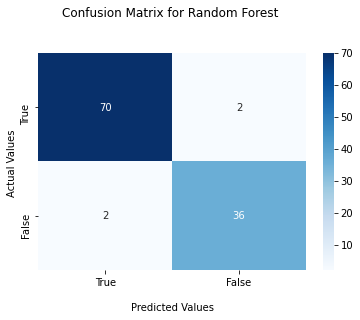

In [59]:
# confusion matrix for random forest
import seaborn as sns

ax = sns.heatmap(results2, annot=True, cmap='Blues')# showing confusion matrix in heatmap

ax.set_title('Confusion Matrix for Random Forest \n\n');# title
ax.set_xlabel('\nPredicted Values')# x lable
ax.set_ylabel('Actual Values ');# ylable

## Ticket labels
ax.xaxis.set_ticklabels(['True','False'])# true , false in x axis
ax.yaxis.set_ticklabels(['True','False'])# true , false in y axis

## Display the visualization of the Confusion Matrix.
plt.show()

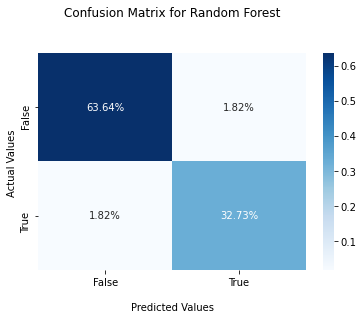

In [60]:
# confusion matrix in percentage
ax = sns.heatmap(results2/np.sum(results2), annot=True, 
            fmt='.2%', cmap='Blues')# showing confusion matrix in heatmap with percentage

ax.set_title('Confusion Matrix for Random Forest\n\n');# title
ax.set_xlabel('\nPredicted Values')# x lable
ax.set_ylabel('Actual Values ');# y lable

## Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])# true , false in x axis
ax.yaxis.set_ticklabels(['False','True'])# true , false in y axis

## Display the visualization of the Confusion Matrix.
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score # roc metrics
from sklearn.metrics import roc_curve, auc # roc and auc curve

fpr_3, tpr_3, threshold_3 = roc_curve(y.iloc[test_index], forest_model_predict_proba[:,1])
roc_auc_3 = auc(fpr_3, tpr_3)

print('AUC : ', roc_auc_score(y.iloc[test_index], forest_model_predict_proba[:,1]))

AUC :  0.9956140350877193


# ROC & AUC Curve

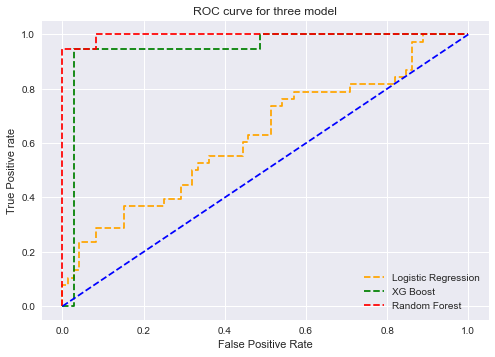

In [62]:
# matplotlib
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model 
#at all classification thresholds. 
# This curve plots two parameters:

#True Positive Rate
#False Positive Rate
import matplotlib.pyplot as plt
plt.style.use('seaborn')
random_probs = [0 for i in range(len(y.iloc[test_index]))] # 
p_fpr, p_tpr, _ = roc_curve(y.iloc[test_index], random_probs, pos_label=1)
# plot roc curves
plt.plot(fpr_1, tpr_1, linestyle='--',color='orange', label='Logistic Regression') # log reg in orange
plt.plot(fpr_2, tpr_2, linestyle='--',color='green', label='XG Boost')# xg boost in green line
plt.plot(fpr_3, tpr_3, linestyle='--',color='red', label='Random Forest')# random forest in red line
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue') # if any model line below than blue line, that model is worst model 
# event though it gives high accuracy
# title
plt.title('ROC curve for three model')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [63]:
# conclusion
# random forest and xg boost model performed well in predicting cirrhosis   with accuracy and roc score of 
# 97,99 and 98,94 respectively , 
# logistics regression are not performed well in predicting cirrhosis
# so we can use ensemble techniques model to predict the cirrhosis and either use one of models to production